In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics
import scipy as sc

In [2]:
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import f

In [3]:
df = pd.read_csv("data.csv")
weights = df['What is your weight? (In kgs)'].tolist()
heights = df['What is your height? (In cm)'].tolist()

In [4]:
def sampling_mean(ls,n,m):
    distribution = []
    for i in range(m):
        selected_items = random.sample(ls, n)
        m = statistics.mean(selected_items)
        distribution.append(m)
    return distribution

In [5]:
def sampling_variance(ls,n,m):
    distribution = []
    sigma2 = statistics.pvariance(ls)
    for i in range(m):
        selected_items = random.sample(ls, n)
        sam_var_s2 = statistics.variance(selected_items)
        distribution.append((n-1)*sam_var_s2/sigma2)
    return distribution

In [6]:
def plot_histogram(data, num_bins):
      # Compute histogram
    counts, bins = np.histogram(data, bins=num_bins)
    bin_width = bins[1] - bins[0]
    normalized_counts = counts / (len(data) * bin_width)

    # Plot histogram
    return bins,normalized_counts,bin_width


<p>ploting of sample variance </p>

* Set the degrees of freedom (dfn and dfd) for the chi-square distributions. These represent the number of variables used in calculating the variances.
* Generate x-values (x1) and probability density functions (pdf1 and pdf2) for the chi-square distributions with the respective degrees of freedom.
* Compute the sample variances (data1 and data2) for the weights and heights datasets using the sampling_variance function. This function randomly samples from the datasets and calculates the variances.
* Create histograms to visualize the distributions:
* Calculate the bin edges, normalized counts, and bin width using the plot_histogram function.
* Plot the histogram bars for the sample variances of weights and heights datasets.
* Plot the corresponding chi-square distribution curves for comparison.
* Display the plots to visualize the distributions of sample variances for weights and heights datasets.

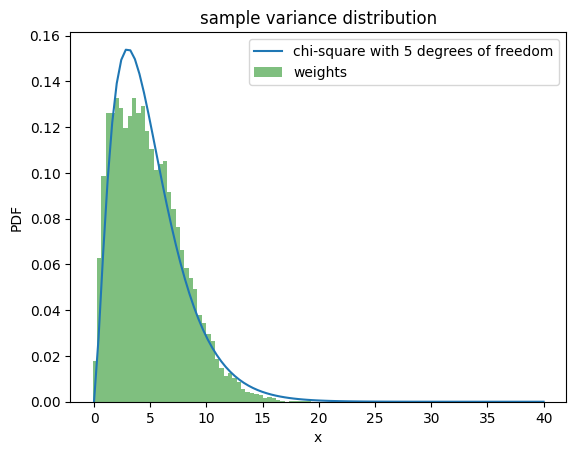

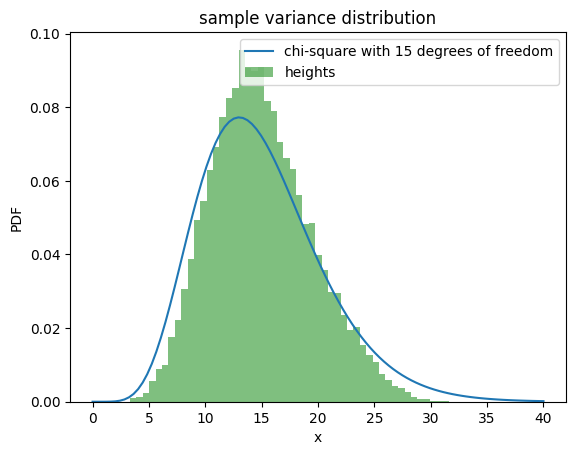

In [7]:
# Set the degrees of freedom
dfn = 5
x1 = np.linspace(0, 40, 100)
pdf1 = chi2.pdf(x1, dfn)

data1 = sampling_variance(weights,dfn+1,20000)
bins,normalized_counts,width = plot_histogram(data1,50)
plt.bar(bins[:-1], normalized_counts, width=width,label = "weights",color='green', alpha=0.5)
plt.plot(x1, pdf1,label = "chi-square with {} degrees of freedom".format(dfn))
plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("sample variance distribution")

# Show the plot
plt.show()

dfd = 15
pdf2 = chi2.pdf(x1, dfd)
data2 = sampling_variance(heights,dfd+1,20000)
bins,normalized_counts,width = plot_histogram(data2,50)
plt.bar(bins[:-1], normalized_counts, width=width,label = "heights",color='green', alpha=0.5)
plt.plot(x1, pdf2,label =  "chi-square with {} degrees of freedom".format(dfd))

plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("sample variance distribution")

# Show the plot
plt.show()

In [8]:
def diff_mean(ls1,ls2,n1,n2,m):
    dist = []
    wgh = sampling_mean(ls1,n1,m)
    hgt = sampling_mean(ls2,n2,m)
    diffmean = statistics.mean(ls1) - statistics.mean(ls2)
    std1 = statistics.stdev(ls1)
    std2 = statistics.stdev(ls2)
    denm = math.sqrt((std1*std1/n1) + (std2*std2/n2))
    for i in range(m):
        temp = (wgh[i] - hgt[i] - diffmean)/denm
        dist.append(temp)
    return dist
    

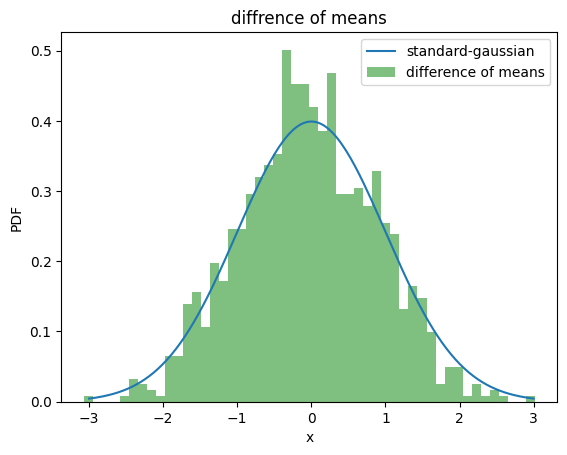

In [9]:
x3 = np.linspace(-3, 3,200)
pdf3 = norm.pdf(x3,0,1)

data3 = diff_mean(weights,heights,10,10,1000)
bins1,normalized_counts1,width1 = plot_histogram(data3,50)
plt.bar(bins1[:-1], normalized_counts1, width=width1,label = "difference of means",color='green', alpha=0.5)
plt.plot(x3, pdf3,label = "standard-gaussian")



plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("diffrence of means")

# Show the plot
plt.show()

<p>The code compares the difference in means between two datasets (weights and heights) using a t-test. It calculates the t-statistics for the difference in means and generates a histogram and plot to visualize their distribution. The plot includes a standard Gaussian distribution curve for comparison. The code aims to provide insights into the significance of the observed difference in means between the two datasets.</p>

In [10]:
def z_test(ls1, ls2, m):
    dist = []
    D = []
    for i in range(len(ls1)):
        D.append(ls1[i] - ls2[i])
    dsamp_mean = sampling_mean(D, 10, m)
    mean = statistics.mean(D)
    std_dev = statistics.stdev(D)
    std_err = std_dev / math.sqrt(10)
    for i in range(m):
        dist.append((dsamp_mean[i] - mean) / std_err)
    return dist
    

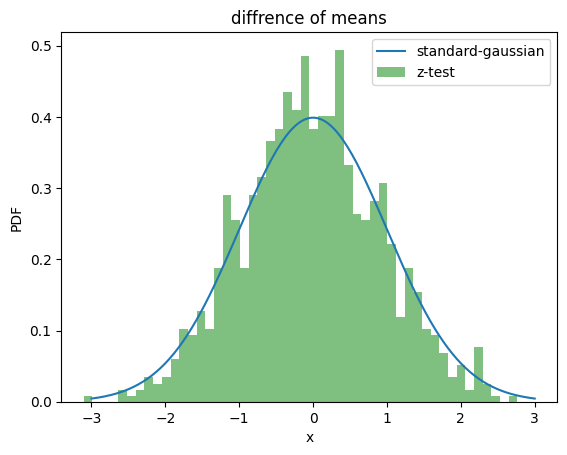

In [11]:
x3 = np.linspace(-3, 3,200)
pdf3 = norm.pdf(x3,0,1)

data3 = z_test(weights,heights,1000)
bins1,normalized_counts1,width1 = plot_histogram(data3,50)
plt.bar(bins1[:-1], normalized_counts1, width=width1,label = "z-test",color='green', alpha=0.5)
plt.plot(x3, pdf3,label = "standard-gaussian")



plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("diffrence of means")

# Show the plot
plt.show()

<p>The code performs a two-sample z-test to compare the means of two datasets (weights and heights). It calculates the z-scores for the difference in means and generates a histogram and plot to visualize their distribution. The plot includes a standard Gaussian distribution curve for comparison. The code aims to determine the statistical significance of the observed difference in means between the two datasets based on the z-scores.</p>

In [12]:
def f_dist1(ls1,ls2,n1,n2):
    dist = []
    for i in range(len(ls1)):
        temp = (ls1[i]*n2)/(ls2[i]*n1)
        dist.append(temp)
    return dist

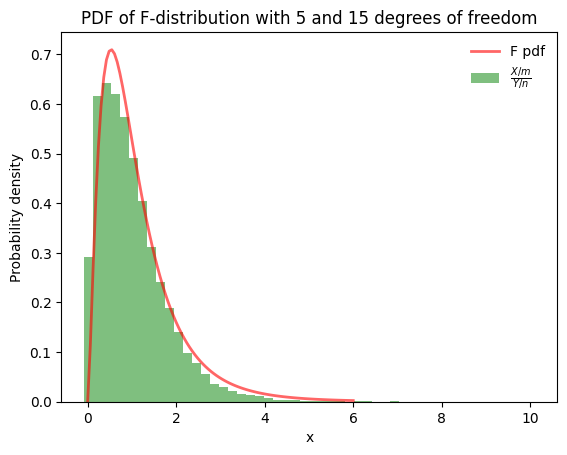

In [13]:
x = np.linspace(0, 6, 100)
data3 = f_dist1(data1,data2,dfn,dfd)
bins1,normalized_counts1,width1 = plot_histogram(data3,50)
plt.bar(bins1[:-1], normalized_counts1, width=width1,label = r'$\frac{ X/ m}{Y/ n} $',color='green', alpha=0.5)
plt.plot(x,f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='F pdf')



plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('PDF of F-distribution with {} and {} degrees of freedom'.format(dfn, dfd))
plt.legend(loc='best', frameon=False)


plt.show()

<p>The code calculates the F-statistic for comparing the variances of two datasets (data1 and data2) using an F-test. It generates a histogram and plot to visualize the distribution of the F-statistic values. The plot includes the probability density function (PDF) of the F-distribution with the specified degrees of freedom (dfn and dfd). The code aims to assess the statistical significance of the difference in variances between the two datasets based on the F-statistic.</p>